In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
data = pd.read_csv('/Users/bhavikmangla/Documents/mrm/Week 2/Week-2-Project/Titanic Dataset/train.csv')
data1 = pd.read_csv('/Users/bhavikmangla/Documents/mrm/Week 2/Week-2-Project/Titanic Dataset/test.csv')
yTest = pd.read_csv('/Users/bhavikmangla/Documents/mrm/Week 2/Week-2-Project/Titanic Dataset/sample_submission.csv')


In [181]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [182]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [183]:
scaler = MinMaxScaler()
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])
scaler.fit(data[['Fare']])
data['Fare'] = scaler.transform(data[['Fare']])
scaler.fit(data[['Fare']])
for i in range(len(data['Sex'].values)):
    if data['Sex'].values[i]=="male":
        data['Sex'].values[i]=0
    else:
        data['Sex'].values[i]=1
    if data['Age'].values[i]==np.NaN:
        data['Age'].values[i]=0
data['Age'] = data['Age'].fillna(0)


data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,0.271174,1,0,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.472229,1,0,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.434531,1,0,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,0.434531,0,0,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,0.334004,0,0,211536,0.025374,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,0.233476,0,0,112053,0.058556,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.000000,1,2,W./C. 6607,0.045771,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,0.321438,0,0,111369,0.058556,C148,C


In [184]:
scaler = MinMaxScaler()
scaler.fit(data1[['Age']])
data1['Age'] = scaler.transform(data1[['Age']])
scaler.fit(data[['Fare']])
data1['Fare'] = scaler.transform(data1[['Fare']])
scaler.fit(data1[['Fare']])
for i in range(len(data1['Sex'].values)):
    if data1['Sex'].values[i]=="male":
        data1['Sex'].values[i]=0
    else:
        data1['Sex'].values[i]=1
data1['Age'] = data1['Age'].fillna(0)
data1['Fare'] = data1['Fare'].fillna(0)


data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,0.452723,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0.617566,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,0.815377,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,0.353818,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.287881,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,0.000000,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.512066,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.505473,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,0.000000,0,0,359309,8.0500,NaN,S


In [185]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
data.Survived.values.shape

(891,)

In [188]:
X_train, X_test, y_train, y_test = data.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare"]].values,data1.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare"]].values,data.Survived.values,yTest.Survived.values

In [189]:

print('Train - Predictors shape', X_train.shape)
print('Test - Predictors shape', X_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)


Train - Predictors shape (891, 6)
Test - Predictors shape (418, 6)
Train - Target shape (891,)
Test - Target shape (418,)


In [190]:
X_train = np.reshape(X_train, (-1,6))
X_test = np.reshape(X_test, (-1,6))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [191]:

print('Train - Predictors shape', X_train.shape)
print('Test - Predictors shape', X_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)


Train - Predictors shape (891, 6)
Test - Predictors shape (418, 6)
Train - Target shape (891, 1)
Test - Target shape (418, 1)


In [192]:
model.fit(X_train, y_train)

/Users/bhavikmangla/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [193]:
for i in X_test:
    print(i)

[3 0 0.45272319662402744 0 0 7.8292]
[3 1 0.6175656072794409 1 0 7.0]
[2 0 0.815376500065937 0 0 9.6875]
[3 0 0.3538177502307794 0 0 8.6625]
[3 1 0.287880785968614 1 1 12.2875]
[3 0 0.18238164314914942 0 0 9.225]
[3 1 0.3933799287880786 0 0 7.6292]
[2 0 0.34063035737834635 1 1 29.0]
[3 1 0.23513121455888172 0 0 7.2292]
[3 0 0.27469339311618096 2 0 24.15]
[3 0 0.0 0 0 7.8958]
[1 0 0.6043782144270078 0 0 26.0]
[1 1 0.3010681788210471 1 0 82.2667]
[2 0 0.8285638929183701 1 0 26.0]
[1 1 0.6175656072794409 1 0 61.175]
[2 1 0.31425557167348017 1 0 27.7208]
[2 0 0.459316893050244 0 0 12.35]
[3 0 0.27469339311618096 0 0 7.225]
[3 1 0.3538177502307794 1 0 7.925]
[3 1 0.5911908215745747 0 0 7.225]
[1 0 0.7230647500989055 1 0 59.4]
[3 0 0.11644467888698405 0 1 3.1708]
[1 1 0.0 0 0 31.6833]
[1 0 0.27469339311618096 0 1 61.3792]
[1 1 0.630753000131874 1 3 262.375]
[3 0 0.6571277858367401 1 0 14.5]
[1 1 0.287880785968614 0 1 61.9792]
[3 0 0.29447448239483054 0 0 7.225]
[1 0 0.5384412501648425 0 0 30

In [194]:
model.score(X_test, y_test)

0.3684210526315789

In [195]:
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [196]:
y_predicted = model.predict(X_test)

In [197]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  2, 264],
       [  0, 152]])

Text(69.0, 0.5, 'Truth')

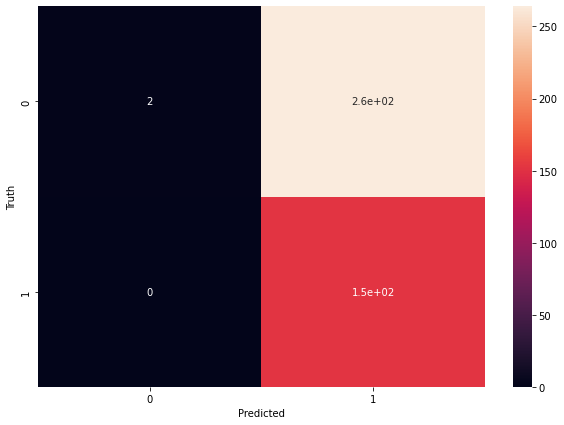

In [199]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [200]:
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))

In [201]:
def predict(features, weights):
  '''
  Returns 1D array of probabilities
  that the class label == 1
  '''
  z = np.dot(features, weights)
  return sigmoid(z)

In [202]:
def cost_function(features, labels, weights):
    '''
    Cost = (labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / observations

    return cost

In [203]:
def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [204]:
def decision_boundary(prob):
  return 1 if prob >= .5 else 0

In [205]:
def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  arr=[]
  for i in predictions:
    arr.append(decision_boundary(i))
  return arr

In [211]:
def train(features, labels, weights, lr, iters):
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        if i % 1000 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

In [213]:
w, c_history = train(X_train.astype(float),y_train.astype(float),theta.astype(float),0.1,10000)

iter: 0 cost: 2.2139190984123553
iter: 1000 cost: 0.4609365880613409
iter: 2000 cost: 0.4596158460745161
iter: 3000 cost: 0.45904153440111195
iter: 4000 cost: 0.4586295002093799
iter: 5000 cost: 0.45830827860695783
iter: 6000 cost: 0.458053314627029
iter: 7000 cost: 0.4578492097498928
iter: 8000 cost: 0.45768472312364494
iter: 9000 cost: 0.457551385313186


In [214]:
w

array([[-0.6405433 ],
       [ 2.76260944],
       [-0.53585291],
       [-0.27196142],
       [-0.08246303],
       [ 2.59096936]])

In [215]:
c_history

[2.2139190984123553,
 1.9878901846802814,
 1.7750347448789694,
 1.5790216630835678,
 1.4033394695067618,
 1.2505165950599153,
 1.1214471686999927,
 1.0151995635617939,
 0.9294024797272165,
 0.8609401711454681,
 0.8065966720147419,
 0.7634601572035561,
 0.7290902619684985,
 0.7015327449378592,
 0.6792622179781667,
 0.6611034310933802,
 0.6461555260253766,
 0.6337281682433635,
 0.6232909948268245,
 0.6144348702953984,
 0.6068426539392833,
 0.6002672771058282,
 0.5945153074846081,
 0.5894345883921445,
 0.584904895595457,
 0.5808308327531202,
 0.577136395485466,
 0.5737607871127699,
 0.570655179926917,
 0.5677801958518567,
 0.5651039381806974,
 0.5626004481056913,
 0.5602484905253401,
 0.5580305963315048,
 0.5559323053073523,
 0.5539415664936627,
 0.5520482625298447,
 0.5502438318469051,
 0.5485209682577705,
 0.546873381873963,
 0.545295608684299,
 0.5437828587898634,
 0.542330895371927,
 0.5409359381060637,
 0.5395945860258743,
 0.5383037558597297,
 0.5370606326725299,
 0.5358626302870636

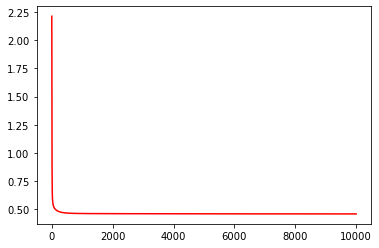

In [217]:
plt.plot(list(range(1,10001)),c_history,color = 'red')

In [219]:
result_y = predict(x_test.astype(float), w.astype(float))

In [221]:
classify(result_y)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
yTest.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data1[['Age']])
data1['Age'] = scaler.transform(data1[['Age']])
scaler.fit(data[['Fare']])
data1['Fare'] = scaler.transform(data1[['Fare']])
scaler.fit(data1[['Fare']])
for i in range(len(data1['Sex'].values)):
    if data1['Sex'].values[i]=="male":
        data1['Sex'].values[i]=0
    else:
        data1['Sex'].values[i]=1
data1['Age'] = data1['Age'].fillna(0)
data1['Fare'] = data1['Fare'].fillna(0)


data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,0.452723,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0.617566,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,0.815377,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,0.353818,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.287881,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,0.000000,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.512066,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.505473,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,0.000000,0,0,359309,8.0500,NaN,S


In [ ]:
scaler = MinMaxScaler()
scaler.fit(data1[['Age']])
data1['Age'] = scaler.transform(data1[['Age']])
scaler.fit(data[['Fare']])
data1['Fare'] = scaler.transform(data1[['Fare']])
scaler.fit(data1[['Fare']])
for i in range(len(data1['Sex'].values)):
    if data1['Sex'].values[i]=="male":
        data1['Sex'].values[i]=0
    else:
        data1['Sex'].values[i]=1
data1['Age'] = data1['Age'].fillna(0)
data1['Fare'] = data1['Fare'].fillna(0)


data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,0.452723,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0.617566,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,0.815377,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,0.353818,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.287881,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,0.000000,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.512066,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.505473,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,0.000000,0,0,359309,8.0500,NaN,S


In [ ]:
scaler = MinMaxScaler()
scaler.fit(data1[['Age']])
data1['Age'] = scaler.transform(data1[['Age']])
scaler.fit(data[['Fare']])
data1['Fare'] = scaler.transform(data1[['Fare']])
scaler.fit(data1[['Fare']])
for i in range(len(data1['Sex'].values)):
    if data1['Sex'].values[i]=="male":
        data1['Sex'].values[i]=0
    else:
        data1['Sex'].values[i]=1
data1['Age'] = data1['Age'].fillna(0)
data1['Fare'] = data1['Fare'].fillna(0)


data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,0.452723,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0.617566,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,0.815377,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,0.353818,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,0.287881,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,0.000000,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,0.512066,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",0,0.505473,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",0,0.000000,0,0,359309,8.0500,NaN,S
